In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np

## Importing and setting up our data

We start by bringing in the CSV data into Python program
We then parse the data using the CSV package
Lastly we close the csv file after we have read the information

In [6]:
with open('data/bestsellers with categories.csv', 'r') as datafile:
    bestsellers = csv.DictReader(datafile)
    data_list = []
    
    for row in bestsellers:
        data_list.append(row)

In [3]:
data_list[0]

{'Name': '10-Day Green Smoothie Cleanse',
 'Author': 'JJ Smith',
 'User Rating': '4.7',
 'Reviews': '17350',
 'Price': '8',
 'Year': '2016',
 'Genre': 'Non Fiction'}

## Format the data before we generate a visualization

Choose only the name, author, year, genre

In [4]:
data = {}

for item in data_list:
    year = item['Year']
    genre = item['Genre']
    name = item['Name']
    
    if not data.get(item['Year']):
        data[item['Year']] = {
        "fiction": [],
        "nonFiction": []
        }
    
    if item['Genre'] == 'Fiction':
        data[item['Year']]['fiction'].append(item['Name'])
    else:
        data[item['Year']]['nonFiction'].append(item['Name'])


## Create the visualization

Now that the data is parsed, we will use matplotlib to create a graph.

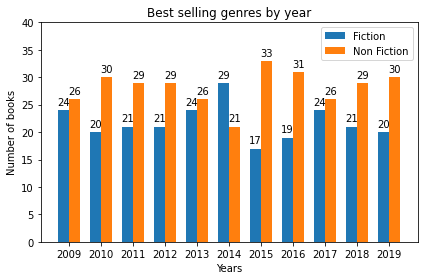

In [7]:
width = .35
years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
fiction = []
nonFiction = []
x = np.arange(len(years))
y = [0, 5, 10, 15, 20, 25, 30, 35, 40]
yLabels = [0, 5, 10, 15, 20, 25, 30, 35, 40]

for year in years:
    fiction.append(len(data[year]['fiction']))
    nonFiction.append(len(data[year]['nonFiction']))

fig, ax = plt.subplots()
rect1 = ax.bar(x - width/2, fiction, width, label='Fiction')
rect2 = ax.bar(x + width/2, nonFiction, width, label='Non Fiction')

ax.set_xlabel('Years')
ax.set_ylabel('Number of books')
ax.set_title('Best selling genres by year')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.set_yticks(yLabels)
ax.set_yticklabels(y)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rect1)
autolabel(rect2)
fig.tight_layout()
plt.show()
